In [1]:
%pylab inline
from operator import *
import numpy as np
# 区分测试集和训练集
from sklearn.cross_validation import train_test_split
# svm
from sklearn import svm
# knn
from sklearn.neighbors import KNeighborsClassifier
# 交叉验证
from sklearn.cross_validation import cross_val_score
# 画图
import matplotlib.pyplot as plt

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [2]:
# payload
f_pl = open('src/payload.txt')
# keyword
f_key = open('src/key_list.txt')
# normal requrire
f_norm = open('src/normal_require.txt')

In [3]:
# 先把读进来的东西变成数组
pl_list = []
for line in f_pl.readlines():
    # 去掉最后的换行符
    line=line.strip('\n')
    pl_list.append(line)
key_list = []
for line in f_key.readlines():
    line=line.strip('\n')
    key_list.append(line)
norm_list = []
for line in f_norm.readlines():
    line=line.strip('\n')
    norm_list.append(line)

In [4]:
def changePayload(payload):
    p_list = []
    # 特殊字符转化
    for i in payload:
        ascii = ord(i)
        if(ascii<48 or ascii>57 and ascii<65 or ascii>90 and ascii < 95 or ascii>95 and ascii<97 or ascii>122):
            if(('ascii'+ str(ascii)) not in p_list):
               p_list.append('ascii'+str(ascii))
            if(i != " "):
                payload = payload.replace(i," ")
    # 16进制转化
    payload = payload.split(" ")
    for word in payload:
        if(word[0:2] == "0x"):
            p_list.append("16hex")
            payload.remove(word)
    # 无关单词转化,key保留
    for word in payload:
        # 在key list中的敏感词
        if word in key_list:
            p_list.append(word)
        # 非敏感词
        elif ("normal_word" not in p_list):
            p_list.append("normal_word")
        else:
            continue
    return p_list

In [5]:
# 创建文本训练集向量
def createDocVec(payloads,requires):
    vec = set([])
    for doc in payloads:
        vec = vec | set(doc)
    for doc in requires:
        vec = vec | set(doc)
    return list(vec)

In [6]:
# 为每一个训练样本生成一个向量，词集模型
def wordToVec(vecList,doc):
    returnVec = [0] * len(vecList)
    for word in doc:
        # 如果
        if(word in vecList):
            returnVec[vecList.index(word)] = 1
        else:
            print("word is not contained:  " + word)
    return returnVec

In [7]:
# payload 和正常请求的数组转化
payloads = []
for pl in pl_list:
    payloads.append(changePayload(pl))
requires = []
for req in norm_list:
    requires.append(changePayload(req))
# payload和正常请求的向量转化
vec_list = createDocVec(payloads,requires)
payloads_vec = []
requires_vec = []
for payload in payloads:
    payloads_vec.append(wordToVec(vec_list,payload))
for require in requires:
    requires_vec.append(wordToVec(vec_list,require))
# payload 向量和普通请求向量
payloads_vec = np.array(payloads_vec)
requires_vec = np.array(requires_vec)


In [8]:
# 生成X
X = np.concatenate((payloads_vec,requires_vec))

In [9]:
# 生成Y
Y = []
for i in range(0,len(payloads_vec)):
    Y.append(1)
for i in range(0,len(requires_vec)):
    Y.append(0)
print 1

1


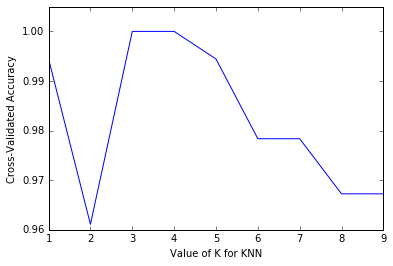

In [11]:
# X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)
# # knn
knn = KNeighborsClassifier()
# # 训练
# knn.fit(X_train,Y_train)

k_range = range(1, 10)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
##    loss = -cross_val_score(knn, X, y, cv=10, scoring='mean_squared_error') # for regression
    scores = cross_val_score(knn, X,Y, cv=10, scoring='accuracy') # for classification
    k_scores.append(scores.mean())
# print k_scores

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()


In [ ]:
print knn.predict(X_test)

In [ ]:
print Y_test